In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [3]:
data_train = pd.read_csv('dataset/fashion-mnist_train.csv')
data_test = pd.read_csv('dataset/fashion-mnist_test.csv')

x_train = np.array(data_train.iloc[:, 1:])
y_train = tf.keras.utils.to_categorical(np.array(data_train.iloc[:, 0]))

X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=13)

x_test = np.array(data_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(data_test.iloc[:, 0]))

In [4]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255

# Prepare the validation images
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_val = x_val.astype('float32')
x_val /= 255

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

In [7]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
cnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [143]:
history3 = cnn3.fit(X_train, Y_train,
          batch_size=256,
          epochs=15,
          verbose=1,
          validation_data=(x_val, y_val))
cnn3.save('fashion_model_three_layer')

Epoch 1/15


188/188 [==============================] - 23s 121ms/step - loss: 0.2829 - accuracy: 0.8965 - val_loss: 0.2604 - val_accuracy: 0.9026
Epoch 2/15
188/188 [==============================] - 24s 128ms/step - loss: 0.2789 - accuracy: 0.8964 - val_loss: 0.2579 - val_accuracy: 0.9028
Epoch 3/15
188/188 [==============================] - 38s 202ms/step - loss: 0.2699 - accuracy: 0.9012 - val_loss: 0.2506 - val_accuracy: 0.9068
Epoch 4/15
188/188 [==============================] - 28s 149ms/step - loss: 0.2635 - accuracy: 0.9023 - val_loss: 0.2581 - val_accuracy: 0.9057
Epoch 5/15
188/188 [==============================] - 61s 323ms/step - loss: 0.2599 - accuracy: 0.9042 - val_loss: 0.2446 - val_accuracy: 0.9091
Epoch 6/15
188/188 [==============================] - 27s 141ms/step - loss: 0.2591 - accuracy: 0.9052 - val_loss: 0.2432 - val_accuracy: 0.9093
Epoch 7/15
188/188 [==============================] - 33s 174ms/step - loss: 0.2533 - accuracy: 0.9065 - val_loss: 0.2387 - val_accuracy: 0.9

INFO:tensorflow:Assets written to: fashion_model_three_layer\assets


INFO:tensorflow:Assets written to: fashion_model_three_layer\assets


In [13]:
model = tf.keras.models.load_model('fashion_model_three_layer')

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.21500042080879211
Test accuracy: 0.9197999835014343


your chosen item - 


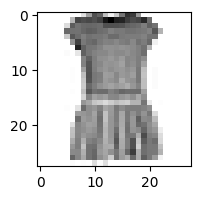

dress
Complete your look with - 
ankle boot


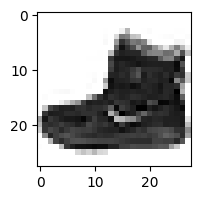

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

sandal


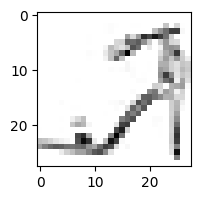

sandal


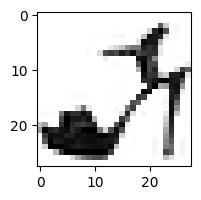

In [14]:
import os
import cv2
model = tf.keras.models.load_model('fashion_model_three_layer')

num = 0
labels = ['t-shirt', 'trousers', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#enter the image you want recommendations for
img = cv2.imread("images/dress3.png")[:,:,0]

img = np.array([img])
prediction = model.predict(img, verbose=0)
ans = labels[np.argmax(prediction)]

print('your chosen item - ')
plt.figure(figsize=(2,2))
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()
print(ans)

print('Complete your look with - ')
while os.path.isfile(f"images/dress{num}.png"):
    try:
        plt.figure(figsize=(2,2))
        img = cv2.imread(f"images/dress{num}.png")[:,:,0]
        img = np.array([img])
        prediction = model.predict(img, verbose=0)
        answer = labels[np.argmax(prediction)]
        if ans == 't-shirt' or ans == 'shirt' or ans == 'pullover' or ans == 'coat':
            if answer == 'trousers' or answer == 'sneaker' or answer == 'ankle boot':
                plt.imshow(img[0], cmap=plt.cm.binary)
                print(answer)
            else:
                plt.show(block=False)
        if ans == 'trousers':
            if answer == 't-shirt' or answer == 'shirt' or answer == 'coat' or answer == 'pullover' or answer == 'sneakers':
                plt.imshow(img[0], cmap=plt.cm.binary)
                print(answer)
            else:
                plt.show(block=False)
        if ans == 'dress':
            if answer == 'sandal' or answer == 'ankle boot':
                plt.imshow(img[0], cmap=plt.cm.binary)
                print(answer)
            else:
                plt.show(block=False)
        if ans == 'bag':
            if answer == 'sandal' or answer == 'ankle boot' or answer == 'sneaker':
                plt.imshow(img[0], cmap=plt.cm.binary)
                print(answer)
            else:
                plt.show(block=False)
        if ans == 'sandal' or ans == 'ankle boot':
            if answer == 'dress':
                plt.imshow(img[0], cmap=plt.cm.binary)
                print(answer)
            else:
                plt.show(block=False)
        plt.show()
    except:
        print('Error')
    finally:
        num += 1